# Decision Tree --> Binary Classication

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("wbc.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop(columns ="Unnamed: 32",inplace=True)

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**from the df "id" col is not required so drop it**

In [9]:
df.drop(columns = "id",inplace=True)

In [10]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

## Replace the "M" as a 1 and "B"as a 0

In [11]:
df['diagnosis']=df['diagnosis'].replace({"M":1,"B":0})
df.head()

C:\Users\Sanjivani\AppData\Local\Temp\ipykernel_24376\3849371037.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis']=df['diagnosis'].replace({"M":1,"B":0})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Take x feature data and y target data from df**

In [12]:
x = df[[
    'radius_mean',
    'perimeter_mean',
    'area_mean',
    'concavity_mean',
    'concave points_mean',
    'radius_worst',
    'perimeter_worst',
    'area_worst',
    'concave points_worst'
]]

In [13]:
#x = df[selected_features]
y = df['diagnosis']


In [14]:
# y = y.map({'M':1,"B":0})

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Scaling is madatory in Decision Tree

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

## Scale the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Decision Tree Fitting

In [19]:
from sklearn.tree import DecisionTreeClassifier

**Initializing the model**

In [20]:
dt = DecisionTreeClassifier()

**Fit the Training data into Decision Tree**

In [21]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Predict the test set label**

In [22]:
y_pred = dt.predict(x_test)

In [23]:
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0]


## Evaluate the Decision Tree

In [24]:
from sklearn.metrics import accuracy_score,f1_score

In [25]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ",acc)

Accuracy :  0.9385964912280702


In [26]:
f1 = f1_score(y_test,y_pred)
print("F1 Score : ",f1)

F1 Score :  0.9090909090909091


## **Reduce the Overfitting** --> To reduce the overfitting in Decision we need to find the maximum depth
## To find the maximum depth we use the "Hit and Trail"

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train, y_train)
  train_acc = accuracy_score(y_train,dt.predict(x_train))
  dt = DecisionTreeClassifier(max_depth=depth)
  val_acc = cross_val_score(dt,x_train,y_train,cv=10)
  print("Depth : ",depth,"Training_accuracy : ",train_acc,"Cross_val_score: ",np.mean(val_acc))


Depth :  1 Training_accuracy :  0.9230769230769231 Cross_val_score:  0.883768115942029
Depth :  2 Training_accuracy :  0.9560439560439561 Cross_val_score:  0.927536231884058
Depth :  3 Training_accuracy :  0.9626373626373627 Cross_val_score:  0.9341545893719807
Depth :  4 Training_accuracy :  0.9714285714285714 Cross_val_score:  0.9297584541062802
Depth :  5 Training_accuracy :  0.9824175824175824 Cross_val_score:  0.9297584541062802
Depth :  6 Training_accuracy :  0.989010989010989 Cross_val_score:  0.9298067632850241
Depth :  7 Training_accuracy :  0.9934065934065934 Cross_val_score:  0.9275845410628019
Depth :  8 Training_accuracy :  0.9978021978021978 Cross_val_score:  0.927632850241546
Depth :  9 Training_accuracy :  1.0 Cross_val_score:  0.9166183574879228
Depth :  10 Training_accuracy :  1.0 Cross_val_score:  0.9121739130434783
Depth :  20 Training_accuracy :  1.0 Cross_val_score:  0.9231884057971014


## The best maximum depth of decision tree is 4 again i am building the model by using the max_depth 4 and evaluate the model to reduce the over fitting

In [28]:
from sklearn.tree import DecisionTreeClassifier
#intialize the model
dt = DecisionTreeClassifier(max_depth = 4)
#fit the training data in decision tree
dt.fit(x_train,y_train)
#predict the test set labels
y_pred = dt.predict(x_test)
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0]


In [29]:
from sklearn.metrics import  accuracy_score,f1_score
y_pred =dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc)
print(f1)

0.9298245614035088
0.8888888888888888


## Feature Importance

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
importence = dt.feature_importances_
list(zip(importence,x_test.columns))

[(np.float64(0.028573496204829962), 'radius_mean'),
 (np.float64(0.0), 'perimeter_mean'),
 (np.float64(0.0), 'area_mean'),
 (np.float64(0.03688514419731043), 'concavity_mean'),
 (np.float64(0.0), 'concave points_mean'),
 (np.float64(0.01712698893480159), 'radius_worst'),
 (np.float64(0.010144692303437862), 'perimeter_worst'),
 (np.float64(0.7553263612181279), 'area_worst'),
 (np.float64(0.1519433171414922), 'concave points_worst')]

[Text(0.72, 0.9166666666666666, 'x[7] <= 884.55\ngini = 0.47\nsamples = 455\nvalue = [283, 172]'),
 Text(0.52, 0.75, 'x[8] <= 0.16\ngini = 0.167\nsamples = 304\nvalue = [276, 28]'),
 Text(0.62, 0.8333333333333333, 'True  '),
 Text(0.32, 0.5833333333333334, 'x[8] <= 0.132\ngini = 0.074\nsamples = 285\nvalue = [274, 11]'),
 Text(0.16, 0.4166666666666667, 'x[3] <= 0.12\ngini = 0.03\nsamples = 259\nvalue = [255, 4]'),
 Text(0.08, 0.25, 'x[8] <= 0.093\ngini = 0.023\nsamples = 254\nvalue = [251, 3]'),
 Text(0.04, 0.08333333333333333, 'gini = 0.01\nsamples = 201\nvalue = [200, 1]'),
 Text(0.12, 0.08333333333333333, 'gini = 0.073\nsamples = 53\nvalue = [51, 2]'),
 Text(0.24, 0.25, 'x[3] <= 0.126\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.28, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.48, 0.4166666666666667, 'x[5] <= 15.615\ngini = 0.393\nsamples = 26\nvalue = [19, 7]'),
 Text(0.4

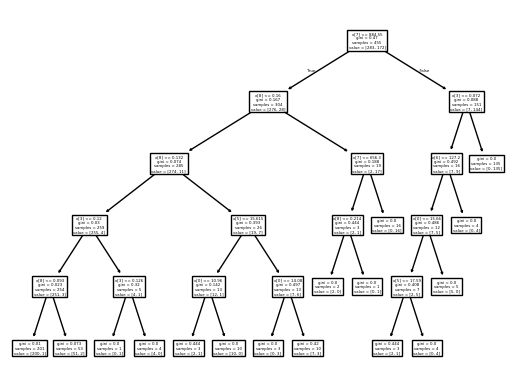

In [31]:
from sklearn import tree
tree.plot_tree(dt)

In [32]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(dt, f)
print("✅ Model and Scaler saved successfully!")

✅ Model and Scaler saved successfully!


In [34]:
import pickle
with open("features.pkl", "wb") as f:
    pickle.dump(x, f)


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

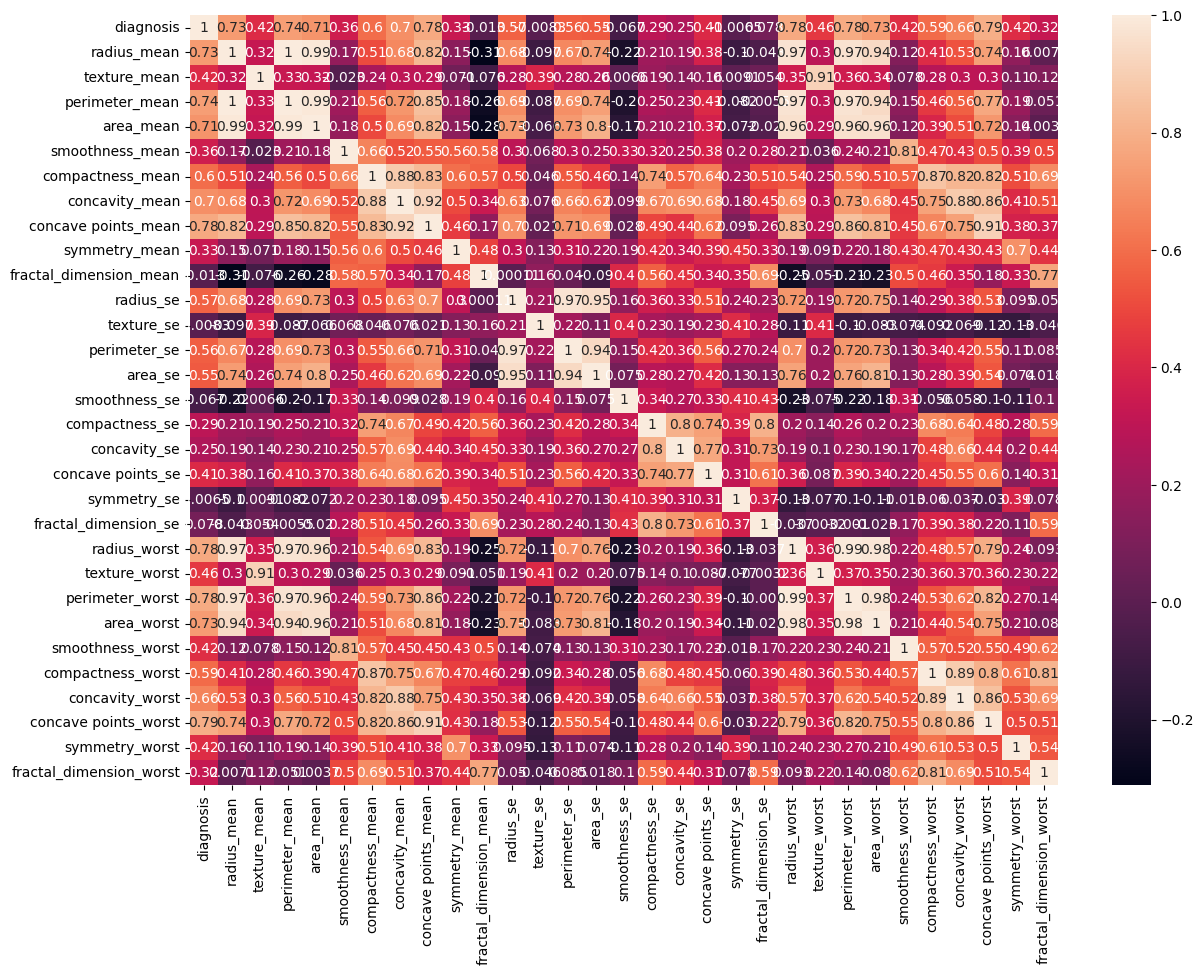

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)